# Replicating Predictive Modelling

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc

## Dataset
* Load dataset
* Handle missing values:
    * remove empty rows
    * fill remaining missing values with the median
* Encode Labels to numeric values (malware=1, goodware=0), using LabelEncoder
* Number of samples: 4464
* Number of features: 241
* Class distribution:
    * malware (1): 3565
    * goodware (0): 899


malware = 1, goodware = 0
Label
1    3565
0     899
Name: count, dtype: int64
Number of rows: 4464
Number of collumns: 241


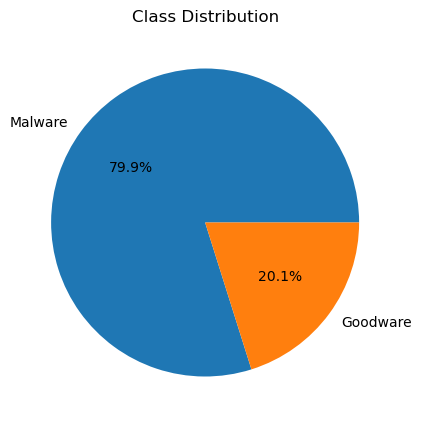

In [23]:
file_path = "./TUANDROMD.csv"
df = pd.read_csv(file_path)

df = df.dropna()
df.isnull().sum()

df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df.iloc[:, :-1].median())      #copilot helped me with this line (filling missing values with median)

label_encoder = LabelEncoder()                                                                                        
df['Label'] = label_encoder.fit_transform(df['Label'])                  # malware = 1, goodware = 0

class_counts = Counter(df['Label'])                                        
print("malware = 1, goodware = 0")

Class = df['Label']
print(Class.value_counts())

X, y = df.drop(columns=['Label']), df['Label']

print("Number of rows:", len(X))
print("Number of collumns:", len(X.columns))

labels = {0: "Goodware", 1: "Malware"}

plt.figure(figsize=(10, 5))
plt.pie(class_counts.values(), labels=[labels[k] for k in class_counts.keys()], autopct='%1.1f%%')
plt.title("Class Distribution")
plt.show()




## Spliting and Normalizing the dataset
* Split the dataset into training (80%) and testing (20%) sets using train_test_split()
* Scale the features using StandardScaler()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classifiers
* Train and evaluate five different classifiers:
  - **Random Forest**
  - **Extra Trees**
  - **AdaBoost**
  - **XGBoost**
  - **Gradient Boosting**
* Use **10-Fold Stratified Cross-Validation** to ensure balanced class distribution.
* Evaluate each model using:
  - **Accuracy**: Measures overall correctness.
  - **F1 Score**: Balances precision and recall.
  - **Precision**: Focuses on how many predicted malware samples are actually malware.
  - **Recall**: Measures how many actual malware samples were correctly classified.


In [25]:
classifiers = {                                                     #chatgpt helped me with the necessary parameters for each classifier                                              
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, algorithm='SAMME', random_state=42),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": round(accuracy, 4),
        "F1 Score": round(f1, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4)
    }
    
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print("="*50)

results_df = pd.DataFrame(results).T
display(results_df)

Random Forest Performance:
Accuracy: 0.9955
F1 Score: 0.9972
Precision: 0.9972
Recall: 0.9972
Extra Trees Performance:
Accuracy: 0.9955
F1 Score: 0.9972
Precision: 0.9972
Recall: 0.9972
AdaBoost Performance:
Accuracy: 0.9798
F1 Score: 0.9874
Precision: 0.9902
Recall: 0.9847
XGBoost Performance:
Accuracy: 0.9944
F1 Score: 0.9965
Precision: 0.9958
Recall: 0.9972
Gradient Boosting Performance:
Accuracy: 0.9866
F1 Score: 0.9917
Precision: 0.9876
Recall: 0.9958


,Accuracy,F1 Score,Precision,Recall
Random Forest,0.9955,0.9972,0.9972,0.9972
Extra Trees,0.9955,0.9972,0.9972,0.9972
AdaBoost,0.9798,0.9874,0.9902,0.9847
XGBoost,0.9944,0.9965,0.9958,0.9972
Gradient Boosting,0.9866,0.9917,0.9876,0.9958


## Visualizations
* **Bar Chart**:  
  - Compares Accuracy, F1 Score, Precision, and Recall across classifiers.  

* **Confusion Matrices**:  
  - Show correct vs. incorrect classifications (True Positives, False Positives, etc.).  

* **ROC Curves**:  
  - Evaluate classifier performance in distinguishing malware from goodware.  
  - Higher AUC (Area Under the Curve) means better classification.  

* **Learning Curves**:  
  - Show the relationship between training size and model performance.  
  - Help identify **overfitting** (if training score is high but validation score is low).  
  - Help determine if **more data** would improve model performance.  

<Figure size 1000x600 with 0 Axes>

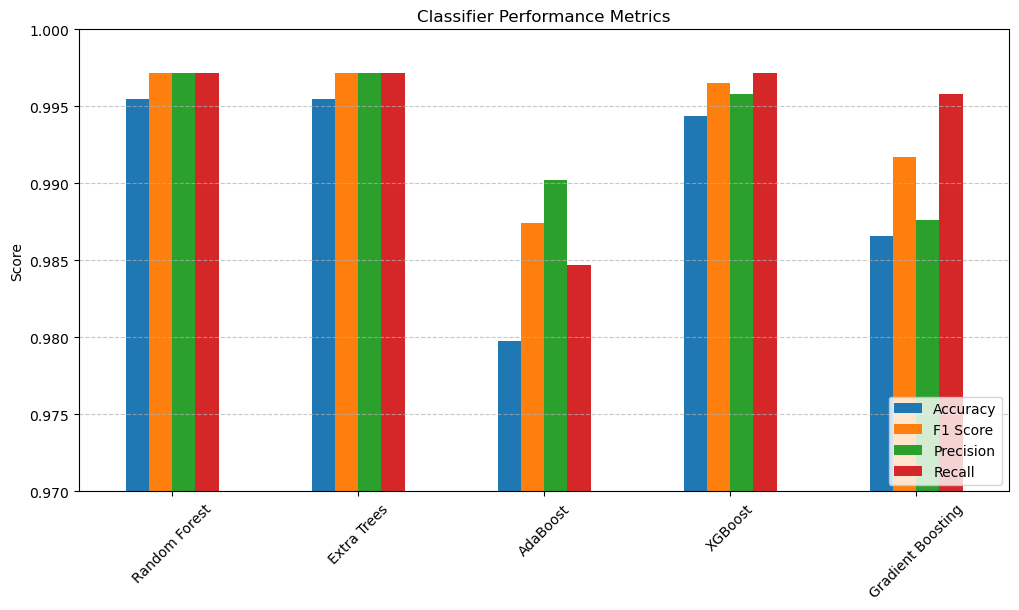

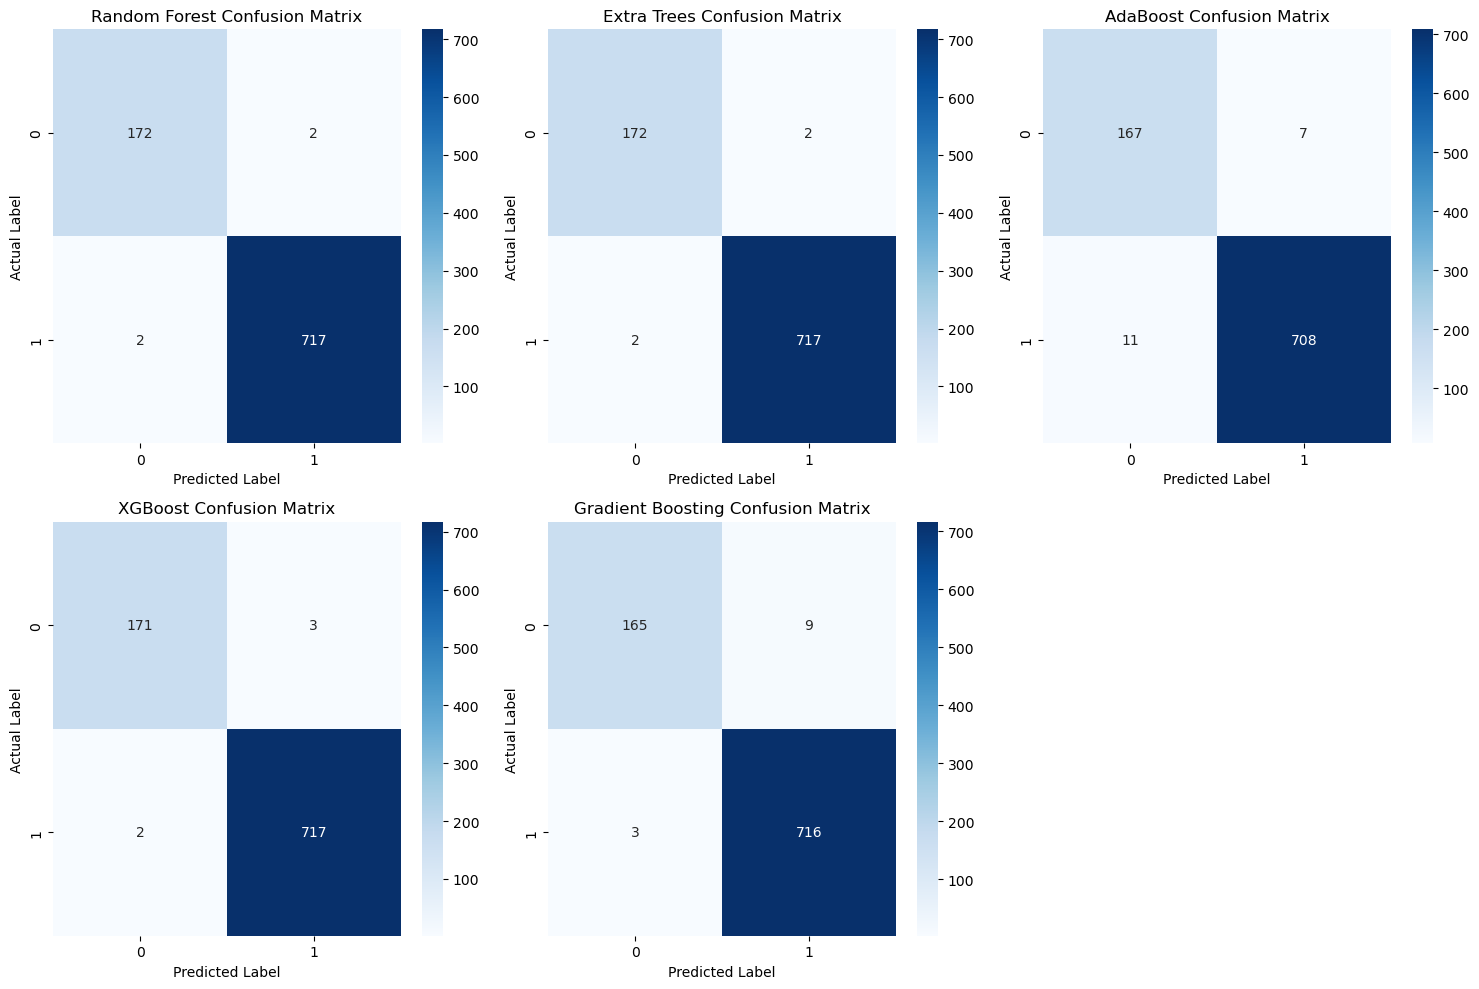

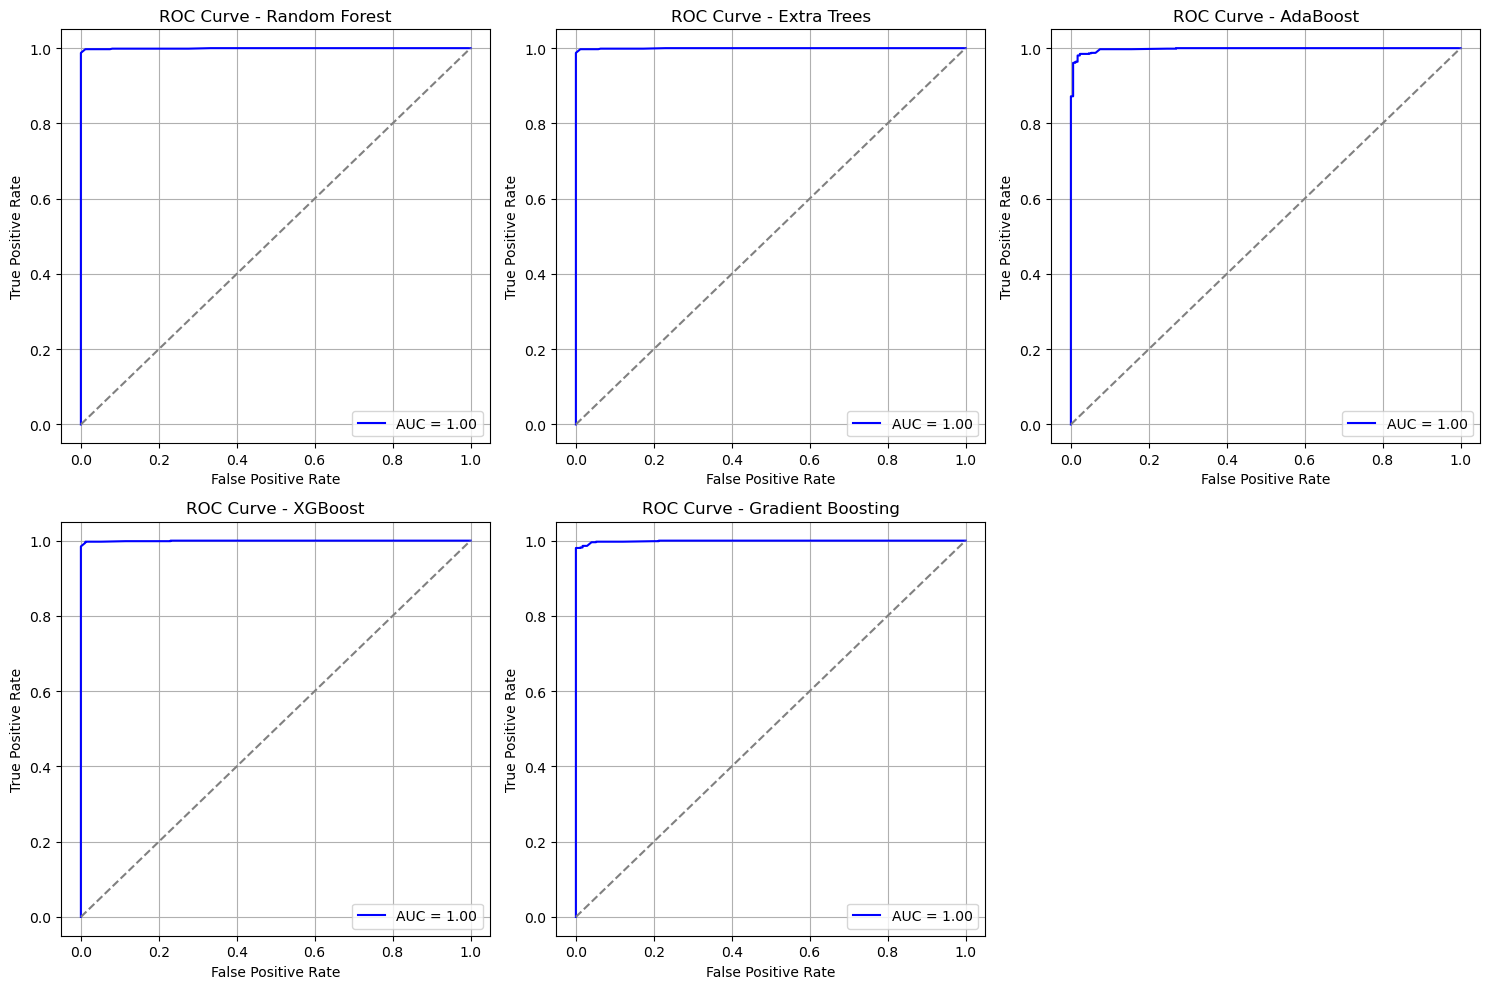

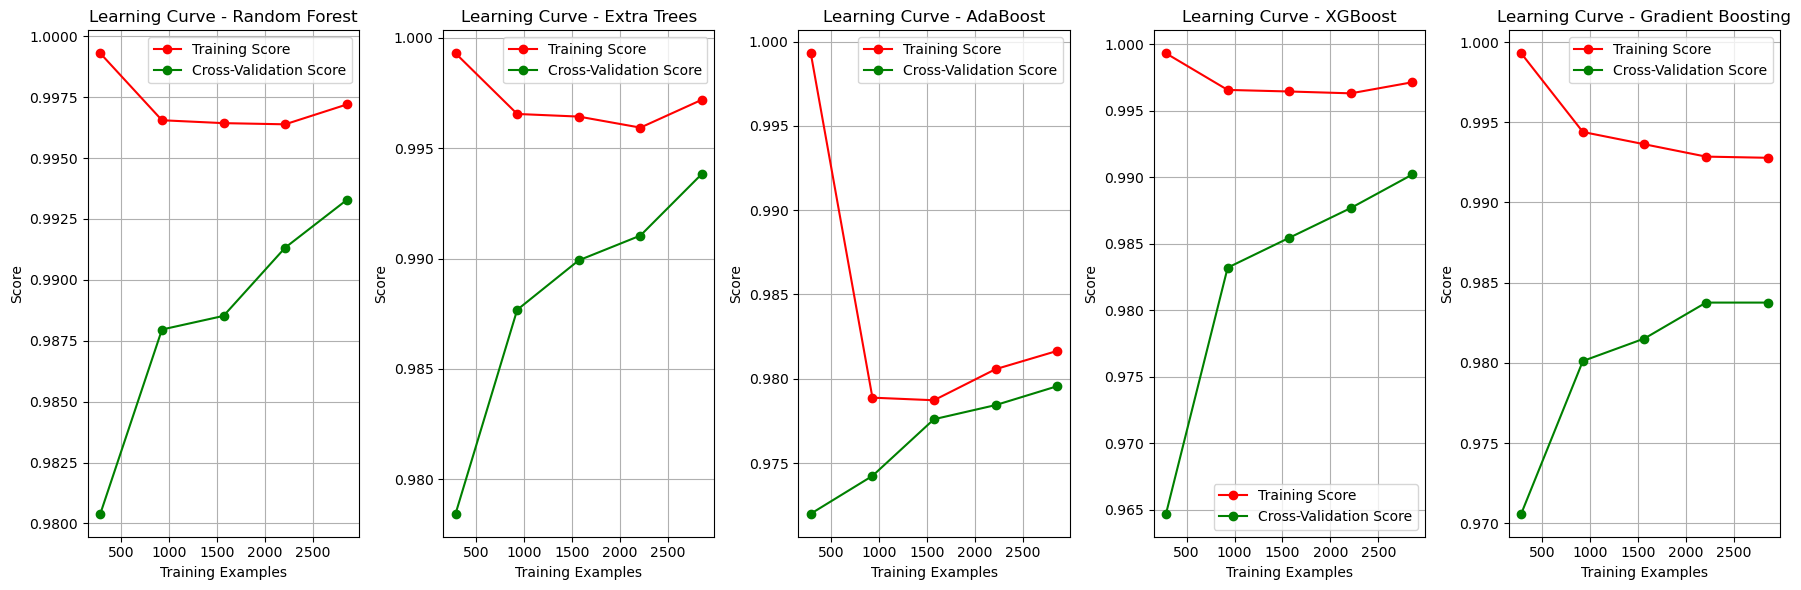

In [26]:
plt.figure(figsize=(10, 6))
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Classifier Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.ylim(0.97, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

num_classifiers = len(classifiers)
rows = (num_classifiers // 3) + (num_classifiers % 3 > 0)  
cols = min(num_classifiers, 3) 

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.ravel()

for idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{name} Confusion Matrix")
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("Actual Label")

for idx in range(num_classifiers, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.ravel()

for idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    axes[idx].plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
    axes[idx].plot([0, 1], [0, 1], linestyle="--", color="gray")
    axes[idx].set_xlabel("False Positive Rate")
    axes[idx].set_ylabel("True Positive Rate")
    axes[idx].set_title(f"ROC Curve - {name}")
    axes[idx].legend()
    axes[idx].grid()


for idx in range(num_classifiers, len(axes)):
    fig.delaxes(axes[idx])
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, len(classifiers), figsize=(18, 6))

for idx, (name, classifier) in enumerate(classifiers.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=5, scoring="accuracy"
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    axes[idx].plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    axes[idx].plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    
    axes[idx].set_title(f"Learning Curve - {name}")
    axes[idx].set_xlabel("Training Examples")
    axes[idx].set_ylabel("Score")
    axes[idx].legend(loc="best")
    axes[idx].grid()

plt.tight_layout()
plt.show()
